<a href="https://colab.research.google.com/github/RainaVardhan/project_voting/blob/main/finalsubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary**

The research question we chose for our project is “Can we predict the outcomes of the 2024 presidential election by analyzing the extent of partisan swing of voting districts from 2012-2020?” The market for predicting election results is a big one, and recently, data science and machine learning predictive algorithms have become prevalent in this market, so this is increasingly relevant. The data that we used included detailed demographic information from the years 2000 through 2020 concerning age, gender, and citizenship status, including how citizenship was obtained, across these counties. We then process another dataset that contains voting data by party and total candidate votes. New features are generated from both, such as the percentage change in votes for different parties over the years and demographic thresholds like age and gender distributions in counties. The method involves connecting each county's election outcome to ascertain the winning candidate for the district and analyzing demographic shifts over the years to correlate these changes with voting patterns. To do this, we build a decision tree model using the features derived from the demographic data and voting data. Using this decision tree model containing demographic and political geography data from the 2020 elections, we can predict the outcomes for the 2024 elections. Initial results from the decision tree model suggest that demographic and historical voting data can indeed provide a predictive insight into future elections. Specifically, the model achieved an accuracy of approximately 78.57% in predicting the winning party by district based on historical data, thereby confirming the significant role of demographic factors and past voting behaviors in forecasting electoral outcomes. The findings highlight the potential of using advanced data analytics in political science to predict election results, providing a valuable tool for political strategists and policymakers. Based on this model, it seems that the Democratic party will win this election. This approach also opens avenues for future research to refine the model's accuracy by integrating additional variables like socio-economic status and expanding the analysis to include other states, thus enhancing the robustness and applicability of the predictive model on a national scale. We also provided other visualizations, like a kernel density plot, to portray variations/trends among specific variables to get a better sense of voting patterns within specific counties.

# **Data**


The data we used to build our model was compiled from multiple sources in order to gain a complete picture of the demographic and political climate across counties within Virginia. Specifically, we used data from the provided 0002_ds250_20205_county_E.csv file to collect demographic data on each county in the state of Virginia from 2016 to 2020 and the voting_VA.csv file to collect data for each presidential election from 2000 to 2020.

The 0002_ds250_20205_county_E.csv file contained demographic data with comprehensive information about the population of each county in Virginia, with a myriad of information from racial demographics to educational demographics. For this project, we specifically decided to focus on three demographics; citizenship status, gender, and age. Specifically, the dataset categorizes citizenship into three categories: U.S. citizens born in the U.S., born abroad, and naturalized citizens. Gender is bifurcated into male and female, while age is segmented into four groups: 18-30 years, 35-64 years, 65-74 years, and 75 years and over. These demographics are crucial as they are known to influence voting behaviors significantly. Some challenges we encountered during handling this dataset included issues related to dealing with NaN values and changing column variable names as they were not useful and intuitive before. Another problem we had is when trying to read the csv file in, we were getting an error that said “UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 157665: invalid continuation byte.” We figured out this usually occurs when you try to read a file with an encoding that doesn't match the file's actual encoding. In this case, the Python environment is assuming that your CSV file is encoded in UTF-8, but it encounters a byte that doesn't fit this encoding. To fix it, we figured out the actual encoding type and specified it.

The provided voting_VA.csv file contained voting data for each presidential election from 2010 to 2020. The first challenge we faced was we wanted to have data from elections going back to 2000, but this did not seem to be possible, so we altered our research question. This means that it contained election results for the Presidential elections in the years 2012, 2016, and 2020,  The election results from each county in the state are broken down by candidate name and the total number of votes for each candidate in a county is also reported. The columns in this dataset’s names were a lot more intuitive than the demographic dataset, so there was not much work that needed to be done there.The preparation of this dataset involved checking for and addressing missing values to ensure completeness; a particular struggle in this department was the fact that some of the rows, like Bedford, seemed to have been accidental double entries, which took some time to figure out. We also had to split the data frames into their respective years to find out which party got the most votes in each county. Another thing that had to be done was clean the data to get the district numbers, which required the creation of a function to make sure the data was uniform and add a space.

The integration of these datasets involved creating a combined framework where demographic attributes could be analyzed alongside voting patterns. This required not only the resolution of format and consistency issues but also careful feature engineering to derive new variables that could effectively capture the relationships within the data. For instance, merging age groups into broader categories required precise calculations to ensure that the resulting variables were meaningful and reflective of the population segments most relevant to the study. Another issue that was faced was issues with whitespaces and upper/lower case discrepancies, which is why our first merge attempt did not work; only after we converted county names to lowercase and removed leading/trailing whitespaces did our merge work. We then saved the combined data to a csv file and filtered the dataset to only include our selected columns of data and set our target variable to return as party for the democratic party.



In [ ]:
! git clone https://github.com/DS3001/project_voting.git

fatal: destination path 'project_voting' already exists and is not an empty directory.


In [ ]:
#cleaned data for county data - get demographics

import pandas as pd
import numpy as np

df = pd.read_csv('/content/project_voting/data/county_data/0002_ds250_20205_county_E.csv', encoding='ISO-8859-1') #asked chat how to fix encoding error
df['U.S. citizen: Born in the US'] = df['AM0KE002']
df['U.S. citizen: Born abroad'] = df['AM0KE004']
df['U.S. citizen: Naturalized'] = df['AM0KE005']
df['Male'] = df['AM8FE002']
df['Female'] = df['AM8FE021']
df['18 to 30 years'] = df['AM8FE009']+df['AM8FE028']
df['35 to 64 years'] = df['AM8FE012']+df['AM8FE031']
df['65 to 74 years'] = df['AM8FE015']+df['AM8FE034']
df['75 years and over'] = df['AM8FE018']+df['AM8FE037']

virginia_county_data = df[df['STATE'] == 'Virginia']

vars_to_keep = ['COUNTY','U.S. citizen: Born in the US', 'U.S. citizen: Born abroad', 'U.S. citizen: Naturalized', 'Male', 'Female', '18 to 30 years', '35 to 64 years', '65 to 74 years', '75 years and over']
county_data = virginia_county_data[vars_to_keep]
# county_data = county_data.drop(virginia_county_data.index[0])
county_data.head()

county_data.isna().sum()
county_data = county_data.dropna()
county_data.isna().sum()
print(county_data.head())



                COUNTY U.S. citizen: Born in the US U.S. citizen: Born abroad  \
2822   Accomack County                        29524                       192   
2823  Albemarle County                        95653                      1470   
2824  Alleghany County                        14733                       111   
2825     Amelia County                        12694                        97   
2826    Amherst County                        30977                       151   

     U.S. citizen: Naturalized   Male Female 18 to 30 years 35 to 64 years  \
2822                       782  15612  16517       26242858       58826474   
2823                      5183  51009  56466     1268513740     1868020763   
2824                        91   7229   7525       13411266       28193052   
2825                        73   6524   6356       11761165       26702667   
2826                       361  15170  16423       30713106       60916596   

     65 to 74 years 75 years and over  
2822

In [ ]:
#cleaned data to get party and total candidate votes 2020

df = pd.read_csv('/content/project_voting/data/voting_VA.csv')
#df.head()

# check for nan values
print(df.isnull().values.any())

# check for possible mistakes
df[df['totalvotes'] == 0]

# split the dataframe into each year
votes_2012 = df[df['year']==2012]
votes_2016 = df[df['year']==2016]
votes_2020 = df[df['year']==2020]

# find out which party got the most votes in each county
winners_2012_idx = votes_2012.groupby('county_name')['candidatevotes'].idxmax() # find maximum number of candidatevotes for county using idxmax
winners_2012 = votes_2012.loc[winners_2012_idx]
winners_2016_idx = votes_2016.groupby('county_name')['candidatevotes'].idxmax()
winners_2016 = votes_2016.loc[winners_2016_idx]
winners_2020_idx = votes_2020.groupby('county_name')['candidatevotes'].idxmax()
winners_2020 = votes_2020.loc[winners_2020_idx]

# combine the dataframes into 1
winners_all = pd.concat([winners_2012,winners_2016,winners_2020])

winners_all

votes_2016[votes_2016['county_name'] == 'BEDFORD']
# the 0 values seems to be an accidental double entry = don't have to clean

False


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1769,48918,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,9768,42525,20220315,TOTAL
1770,48919,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,DONALD TRUMP,REPUBLICAN,30659,42525,20220315,TOTAL
1771,48920,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,OTHER,OTHER,2098,42525,20220315,TOTAL
2030,49179,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0,20220315,TOTAL
2031,49180,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,DONALD TRUMP,REPUBLICAN,0,0,20220315,TOTAL
2032,49181,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,OTHER,OTHER,0,0,20220315,TOTAL


In [ ]:
#cleaned data to get district number

df = pd.read_csv('/content/project_voting/data/county_adjacencies.csv')
columns_to_keep = ['County', 'District']
districts = df[columns_to_keep].sort_values(by='District')
districts.to_csv('districts.csv', index=False)
def add_space_before_capitalized(value):
    return value[0] + ''.join(' ' + char if char.isupper() else char for char in value[1:])

# Apply the function to the 'variable' column
districts['County'] = districts['County'].apply(add_space_before_capitalized).str.upper()

print(districts)

                 County  District
66         KING WILLIAM         1
127        WESTMORELAND         1
104            RICHMOND         1
95        POQUOSON CITY         1
87       NORTHUMBERLAND         1
..                  ...       ...
100      PRINCE WILLIAM        10
103        RAPPAHANNOCK        10
76   MANASSAS PARK CITY        10
38         FAIRFAX CITY        11
37              FAIRFAX        11

[133 rows x 2 columns]


# **Results**


#**Decision Tree**

Our predictive algorithm combines demographic data and voting district information from the 2020 Virginia elections. By incorporating both demographic characteristics and political geography of all the different counties in Virginia, the model aims to provide a comprehensive understanding of election outcomes. The predictive algorithm is intended to be tested on demographic data from 2024, enabling it to possibly predict the outcome of the 2024 Virginia elections. With the potential similarity to the 2020 election, where Biden and Trump were key contenders, the model can offer insights into the potential outcomes of this rematch.


The data used in the model included the following variables: voting district, citizenship status, gender, and age distribution within counties. The variables on the demographic data, citizenship status, gender, and age, are commonly known to influence voting behavior and are therefore crucial for understanding electoral outcomes. The decision nodes in our model analyze demographic thresholds within counties, such as the proportion of citizens in different age groups or gender categories. Based on these thresholds, the model then considers the voting districts in Virginia to further refine predictions and improve the algorithm's accuracy.


We chose to utilize a decision tree model for several reasons. Decision trees are particularly well-suited for handling complex datasets with a mix of categorical and numerical features, as they inherently perform feature selection and provide a clear and interpretable structure for decision-making. This clarity is advantageous when we aim to understand and explain the factors influencing voting patterns across counties. We employed the DecisionTreeClassifier with specific parameters—maximum depth of 8 and a minimum of 5 samples per leaf—to balance complexity and prevent overfitting. This strategic choice aids in achieving a reliable generalization of the model on unseen data. We divided our dataset into a 90/10 split for training and testing, respectively, which allows us to assess the model's performance effectively.


The tree first splits on the variable citizenship status, indicating its significant impact on voting patterns. It divides the population into naturalized citizens and those born in the US, reflecting how these different types of citizenships have different political preferences due to having diverse experiences related to immigration and varying citizenship policies. Then, the tree splits based on different age categories: 18 to 30 years and 35 to 64 years. This highlights how different age groups have varied priorities and values affecting their political standing in voting. The tree then further classifies voters based on a mix of all the variables such as citizenship status, age, gender, and voting district to try to predict what political party they would vote for.

     index               COUNTY U.S. citizen: Born in the US  \
0        0             accomack                        29524   
1        1            albemarle                        95653   
2        2            alleghany                        14733   
3        3               amelia                        12694   
4        4              amherst                        30977   
..     ...                  ...                          ...   
126    126         suffolk city                        86063   
127    127  virginia beach city                       394661   
128    128      waynesboro city                        20936   
129    129    williamsburg city                        13494   
130    130      winchester city                        23264   

    U.S. citizen: Born abroad U.S. citizen: Naturalized    Male  Female  \
0                         192                       782   15612   16517   
1                        1470                      5183   51009   56466   
2     

<ipython-input-9-dd29cf904ef7>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)


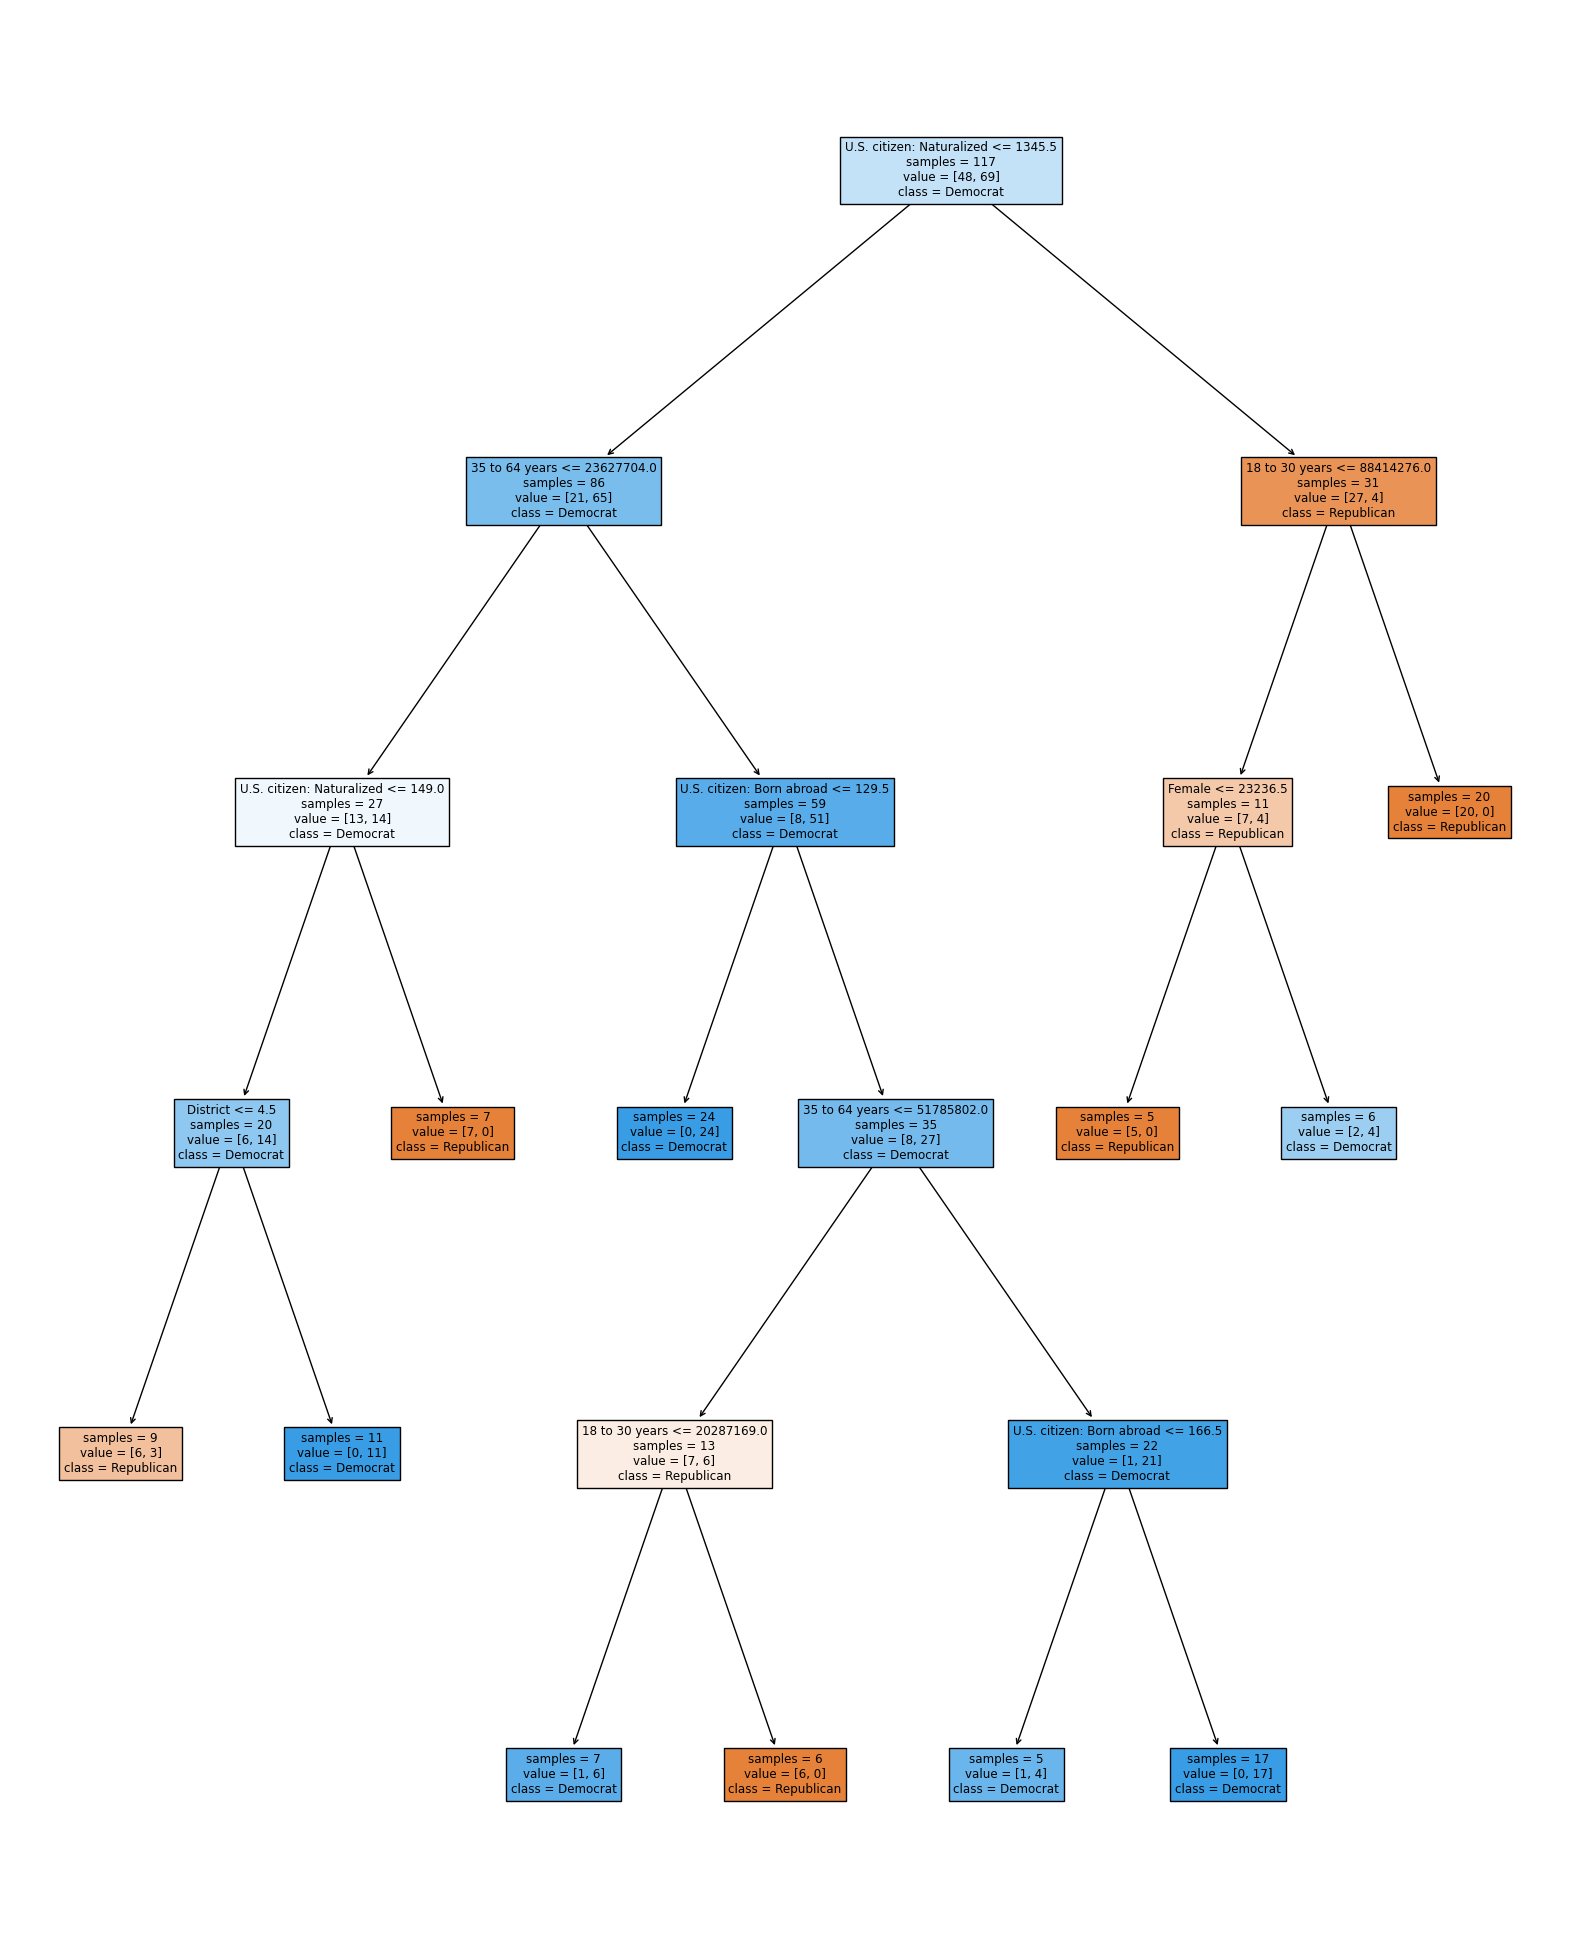

Accuracy: 0.7857142857142857


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

county_data['COUNTY'] = county_data['COUNTY'].str.replace(' County', '')
# # merge county_data with votes
# combined = pd.merge(county_data,winners_2020, left_on='COUNTY', right_on='county_name', how='inner')
# combined.drop('county_name', axis=1, inplace=True)

# # merge combined with district_data
# combined = pd.merge(combined, districts, left_on='COUNTY', right_on='County', how='inner')

# # convert county names to uppercase and sort
# combined['COUNTY'] = combined['COUNTY'].str.upper()
# combined = combined.sort_values(by='COUNTY', ascending=True)
# Convert county names to lowercase and remove leading/trailing whitespaces
county_data['COUNTY'] = county_data['COUNTY'].str.strip().str.lower()
winners_2020['county_name'] = winners_2020['county_name'].str.strip().str.lower()
districts['County'] = districts['County'].str.strip().str.lower()

# Retry the merging process
combined = pd.merge(county_data, winners_2020, left_on='COUNTY', right_on='county_name', how='inner')
combined = pd.merge(combined, districts, left_on='COUNTY', right_on='County', how='inner')
# Reset index - chat
combined = combined.reset_index(drop=False)

print(combined)

# Save to CSV
combined.to_csv('combined.csv', index=False)


selected_features = ['District','U.S. citizen: Born in the US', 'U.S. citizen: Born abroad', 'U.S. citizen: Naturalized', 'Male', 'Female', '18 to 30 years', '35 to 64 years', '65 to 74 years', '75 years and over']
target_variable = 'party'

# Filter dataset to include only selected features and target variable
trainData = combined[selected_features + [target_variable]]
trainData.dropna(inplace=True)
X = trainData[selected_features]
y = trainData[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)


plt.figure(figsize=(20, 25))
plot_tree(clf, filled=True, feature_names=selected_features, class_names= ['Republican', 'Democrat'], impurity=False)
plt.show()


y_pred = clf.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




After fine-tuning the dataset and refining the model parameters to create the decision tree, our predictive algorithm achieved an accuracy of 78.57%. This accuracy level demonstrates the model's effectiveness in capturing the complex interplay between demographics and electoral outcomes. Furthermore, it establishes how variables such as citizenship status, age distribution, and gender composition can significantly affect voting behavior in Virginia. For example, with citizenship status, naturalized citizens may have distinct views on immigration policies, international relations, and policies that affect their integration and rights within the US compared to those who were born in the US. Additionally, different age groups often prioritize different issues as younger voters usually have stronger views on climate change, education, and societal justice while older votes are more focused on Medicare, Social Security, and pension security. Historically, older age groups tend to have higher voter turnout rates compared to younger voters which has a significant impact on election outcomes. Gender is also an influential factor in voting results as women generally prioritize issues such as healthcare, education, and social welfare and might have strong views on abortion, gender equality, and family planning; while men, on the other hand, prioritize issues such as economy, taxes, and national security and thus might vote for a candidate that focuses on those issues. With this decision tree, we can see the interplay between these demographic factors and the different mixes between all these factors that influence voting behaviors and preferences in presidential elections.


Though our accuracy of 78.57% is relatively high, there are some limitations with our dataset that might be influencing it. Since our training data is only specifically looking at voting districts and some demographic data, which are known to be influential factors in voting turnout, it does not fully represent the entire population to accurately predict outcomes across all scenarios. Specifically, it does not consider other crucial predictors that influence voting behavior such as economic factors, educational background, ethnic background, or income level to name a few. If our data was more broad rather than highly specific, the decision tree could have been a lot more accurate at predicting. Moreover, with our research question, we are looking at only the most recent voting election, 2020, and demographic data from 2016 to 2020, which further causes underfitting in our decision tree. We are not considering variability in voter behavior and how recent political events, changes in voter sentiment, and the increased importance of new issues affect the outcome of the 2024 presidential voting.


# **Visualization**

To gain a better understanding of the data being used, some visualizations were created to assess any variations or trends within certain variables. First, a kernel density plot of the total number of votes was generated to see the population distribution of the counties. In the plot, there is a very distinct peak somewhere between 0 and 100,000.  This indicates that most of the counties and localities within the data set had less than 100,000 votes cast in an election.  A very small peak is present at around 200,000, indicating that there are likely a few counties with slightly higher populations. Lastly, there is a small bump at around 600,000 total votes that is probably due to one or two counties with much higher populations (and therefore more votes) than the rest of the counties within the state.  

In [ ]:
var1 = 'totalvotes'
var2 = 'candidatevotes'
cat1 = 'party'
cat2 = 'mode'
cat3 = 'District'

<Axes: xlabel='totalvotes', ylabel='Density'>

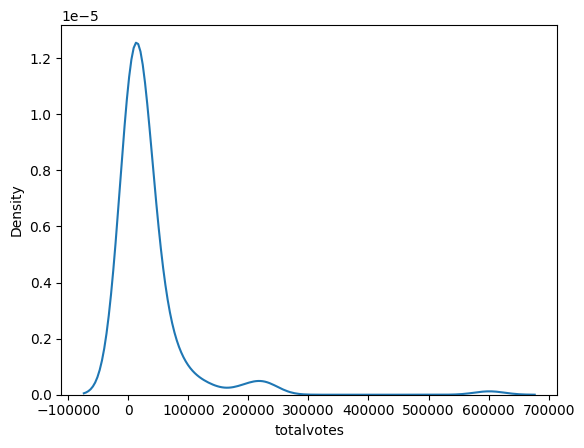

In [ ]:
sns.kdeplot(combined[var1])

<Axes: xlabel='candidatevotes', ylabel='Density'>

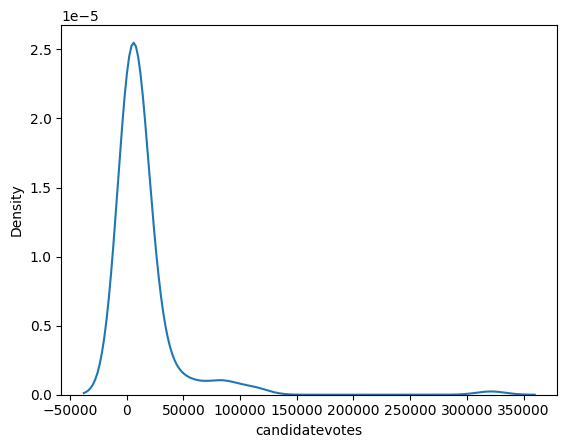

In [ ]:
sns.kdeplot(combined[var2])

<Axes: xlabel='totalvotes'>

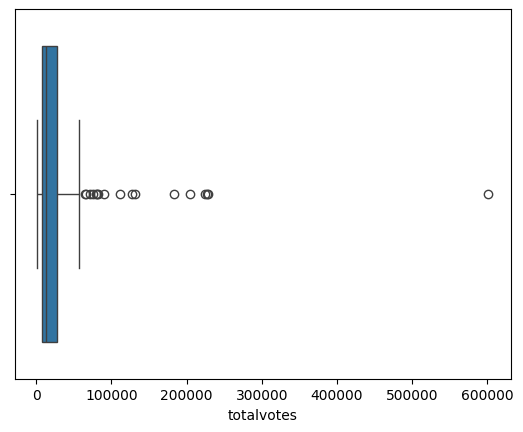

In [ ]:
sns.boxplot(data=combined, x=var1)

A boxplot was also created and some statistics were calculated to provide a more in-depth analysis of the totalvotes variable for each county.  The range of values for the variable is very wide, from 1533 to 601243, and the median of 13487 is lower than the mean of 33652.  This indicated that the values are positively skewed, which can be seen in the boxplot and the numerous outliers at higher values. Overall, this reveals a few important details about the totalvotes variable and population distribution of Virginia.  A majority of localities within the state have a smaller number of voters, but there are a few counties that have a much higher number of votes cast.  In summary, there is a lot of variation across the state in terms of total votes that may impact the results of the model.

<Axes: xlabel='totalvotes', ylabel='Count'>

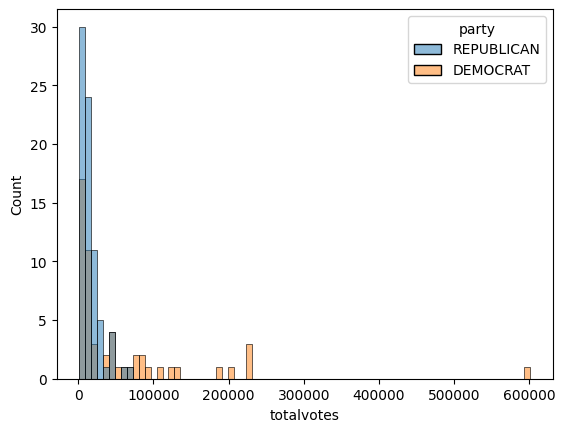

In [ ]:
sns.histplot(data=combined, x=var1, hue = cat1)

<Axes: xlabel='totalvotes', ylabel='Count'>

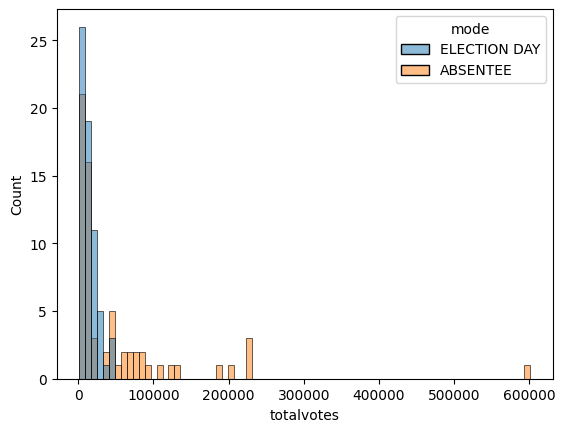

In [ ]:
sns.histplot(data=combined, x=var1, hue = cat2)

A histogram was also created to see if there were any trends in party affiliation based upon the totalvotes variable. In the graph, it appears that smaller counties overwhelmingly vote republican; in fact there are no counties with over 100,000 total votes that had a republican winner.  On the other hand, the larger outlier counties with greater than 100,000 total votes all voted for the democratic candidate. One of the reasons for this trend may be the geographic location; the smaller counties are likely in rural areas while the larger places are probably the suburban areas of main cities within the state.  Overall, this reveals the relationship between the total number of votes and political views of a county in Virginia.

<Axes: xlabel='totalvotes', ylabel='Count'>

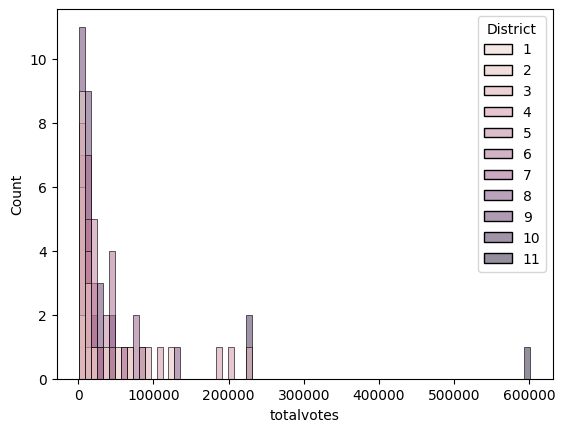

In [ ]:
sns.histplot(data=combined, x=var1, hue = cat3)

In [ ]:
## This was just to check if the data frames were merging correctly
print("Unique values in county_data['COUNTY']:\n", county_data['COUNTY'].unique())
print("Unique values in winners_2020['county_name']:\n", winners_2020['county_name'].unique())
print("Unique values in districts['County']:\n", districts['County'].unique())

# Convert county names to lowercase and remove leading/trailing whitespaces
county_data['COUNTY'] = county_data['COUNTY'].str.strip().str.lower()
winners_2020['county_name'] = winners_2020['county_name'].str.strip().str.lower()
districts['County'] = districts['County'].str.strip().str.lower()

# Retry the merging process
combined = pd.merge(county_data, winners_2020, left_on='COUNTY', right_on='county_name', how='inner')
combined = pd.merge(combined, districts, left_on='COUNTY', right_on='County', how='inner')

# Print the merged DataFrame
print("Combined DataFrame:\n", combined.head())

Unique values in county_data['COUNTY']:
 ['accomack' 'albemarle' 'alleghany' 'amelia' 'amherst' 'appomattox'
 'arlington' 'augusta' 'bath' 'bedford' 'bland' 'botetourt' 'brunswick'
 'buchanan' 'buckingham' 'campbell' 'caroline' 'carroll' 'charles city'
 'charlotte' 'chesterfield' 'clarke' 'craig' 'culpeper' 'cumberland'
 'dickenson' 'dinwiddie' 'essex' 'fairfax' 'fauquier' 'floyd' 'fluvanna'
 'franklin' 'frederick' 'giles' 'gloucester' 'goochland' 'grayson'
 'greene' 'greensville' 'halifax' 'hanover' 'henrico' 'henry' 'highland'
 'isle of wight' 'james city' 'king and queen' 'king george'
 'king william' 'lancaster' 'lee' 'loudoun' 'louisa' 'lunenburg' 'madison'
 'mathews' 'mecklenburg' 'middlesex' 'montgomery' 'nelson' 'new kent'
 'northampton' 'northumberland' 'nottoway' 'orange' 'page' 'patrick'
 'pittsylvania' 'powhatan' 'prince edward' 'prince george'
 'prince william' 'pulaski' 'rappahannock' 'richmond' 'roanoke'
 'rockbridge' 'rockingham' 'russell' 'scott' 'shenandoah' 'smyth'
 

In [ ]:
#verify that there is the correct data in the dataframe
print("Combined DataFrame:\n", combined.head())

Combined DataFrame:
       COUNTY U.S. citizen: Born in the US U.S. citizen: Born abroad  \
0   accomack                        29524                       192   
1  albemarle                        95653                      1470   
2  alleghany                        14733                       111   
3     amelia                        12694                        97   
4    amherst                        30977                       151   

  U.S. citizen: Naturalized   Male Female 18 to 30 years 35 to 64 years  \
0                       782  15612  16517       26242858       58826474   
1                      5183  51009  56466     1268513740     1868020763   
2                        91   7229   7525       13411266       28193052   
3                        73   6524   6356       11761165       26702667   
4                       361  15170  16423       30713106       60916596   

  65 to 74 years 75 years and over  ...  county_fips        office  \
0       21302376          13381

# **Conclusion**

Our project represents an analysis of factors influencing voting outcomes in Virginia, particularly focusing on the 2020 elections and potential implications for this year’s presidential election. By using demographic data and the geography of counties in Virginia from 2012 to 2020, our predictive algorithm can offer insight into voting behavior, showing the complexities involving citizenship, age, and gender that impact party preference. With an accuracy of 0.7857, this model shows that there is relevance of demographic insights in understanding the electoral dynamics, which can provide a prediction for how Virginia may vote in this year’s election.

Indeed, our project has its limitations. Some may criticize the simplicity of our model, which relies solely on demographic variables and voting districts. To address this concern, future iterations of our decision tree could incorporate additional factors such as socioeconomic status. By doing so, we can enhance the predictive power of our algorithm and broaden the scope of our analysis. Furthermore, our model currently focuses exclusively on Virginia elections. We chose to group counties by voting districts because there is a stronger correlation between citizens and their voting behavior when grouped by district rather than by individual counties. This simplification of our model makes it more accessible and easily interpretable by other stakeholders. However, there is potential for expanding the applicability of our prediction to other states. By scaling up the model and incorporating data from diverse regions, we can gain a more comprehensive understanding of voting behavior across the United States. This would enable us to predict electoral outcomes on a national level, providing valuable insights for policymakers and strategists. We can also include more demographics besides gender, citizen status, and age like education background and racial background to gain a more comprehensive view on what exactly is affecting changing voting patterns. This could also help politicians see what demographics they need to target in gaining more votes.

One other potential expansion for our project is incorporating historical data from more elections; right now we only use from 2012, but going back further may help to perform a more comprehensive temporal analysis, which would allow us to observe and analyze trends over time. This may help in providing insights into how voting behaviors and demographic influences have evolved. With this increased temporal analysis, we can enhance the robustness of our model, making it not only more accurate for predicting the 2024 election, but also potentially more accurate in understanding long term shifts in elections to predict election results beyond 2024 as well. We realize that the political climate is often unpredictable and anything can happen in the next 4 and a half years till the 2028 election, let alone in the next 8 and a half years, but having these resources can give politicians and others crucial information and also provide a deeper understanding of the factors that drive changes in voting patterns.

Another way to have a more nuanced approach on demographic driven prediction models is to have additional research questions surrounding the specific policies of each party during the election. As addressed above, the political climate is unpredictable, and the issues and opinions of communities and political parties change throughout time. If we are to have a deeper understanding of how different demographics of people are voting and for what reason, it’s essential to go beyond party lines and understand how voters feel about actual policy decisions. An example of this might be to try to predict who would support the expansion of welfare, and then whether that person’s likely to vote Democrat or Republican or third party. This would take into account the changing views of major political parties in America.

In conclusion, while our project has its limitations, it also presents opportunities for future research and refinement. By addressing the criticisms and expanding the scope of our analysis, we can continue to improve the accuracy and applicability of our predictive algorithm, ultimately contributing to a better understanding of electoral dynamics in the United States with the use of 2024 data.

